# **Chatbot with RNN LSTM**

Importing Libraries

In [ ]:
import nltk
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding, LSTM, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import random
import pandas as pd
import matplotlib.pyplot as plt

Uploading File

In [ ]:
import io
import os
from google.colab import files
## Uploading the file
file_upload = files.upload()

Saving data.json to data.json


Data Preprocessing
* Appending data to lists (tags and inputs)

In [ ]:
# Getting all data to list
tags=[]
inputs = [] # pattern
responses={}
documents = []
#ignore_words = ['?', '!']
data_file = open('/content/data.json').read()
data1 = json.loads(data_file)

for intent in data1['intents']:
    responses[intent['tag']]= intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [ ]:
pickle.dump(inputs,open('texts.pkl','wb'))
pickle.dump(tags,open('labels.pkl','wb'))

In [ ]:
# Converting to Pandas Dataframe
data=pd.DataFrame({"inputs":inputs,
                    "tags":tags})

In [ ]:
print(data)

                                  inputs                    tags
0                               Hi there                greeting
1                            How are you                greeting
2                       Is anyone there?                greeting
3                                    Hey                greeting
4                                   Hola                greeting
5                                  Hello                greeting
6                               Good day                greeting
7                                    Bye                 goodbye
8                          See you later                 goodbye
9                                Goodbye                 goodbye
10             Nice chatting to you, bye                 goodbye
11                        Till next time                 goodbye
12                                Thanks                  thanks
13                             Thank you                  thanks
14                       

In [ ]:
data=data.sample(frac=1)

In [ ]:
# Import preprocessing to remove the punctuations
import string
data['inputs']= data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data

,inputs,tags
0,hi there,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hey,greeting
4,hola,greeting
5,hello,greeting
6,good day,greeting
7,bye,goodbye
8,see you later,goodbye
9,goodbye,goodbye


In [ ]:
# Tokenize the data 
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])

# Apply Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

# Encoding the outputs
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [ ]:
input_shape=x_train.shape[1]
print(input_shape)

6


In [ ]:
# Define Vocabulary
vocabulary=len(tokenizer.word_index)
print("number of unique words:",vocabulary)
output_length=le.classes_.shape[0]
print("outputlength:",output_length)

number of unique words: 59
outputlength: 10


#### Build the model

In [ ]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model= Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding (Embedding)       (None, 6, 10)             600       
                                                                 
 lstm (LSTM)                 (None, 6, 10)             840       
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 10)                610       
                                                                 
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Training the model
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.3080 - accuracy: 0.0690
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 2.3056 - accuracy: 0.0690
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 2.3032 - accuracy: 0.0690
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 2.3009 - accuracy: 0.0690
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 2.2987 - accuracy: 0.1034
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 2.2964 - accuracy: 0.3793
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 2.2942 - accuracy: 0.3793
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 2.2920 - accuracy: 0.3448
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 2.2898 - accuracy: 0.3448
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 2.2875 - accuracy: 0.3448
Epoch 11/200
1/1 [=======

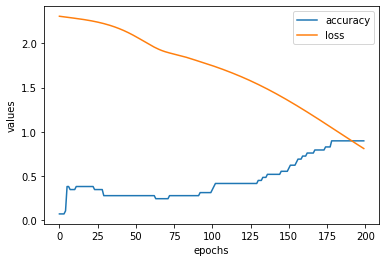

In [ ]:
# Model Accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend(['accuracy','loss'])
plt.xlabel("epochs")
plt.ylabel("values")
plt.show()

Above plot shows that the model achieved 89% accuracy after 180 iterations and is training slowly after every iteration. Also, the model loss is reduced after every epoch with 0.8 at 200th  epoch.


In [ ]:
model.save('model.h5', train)


#### Testing the model

In [ ]:
import random 

while True:
  texts_p=[]
  prediction_input=input('User:')


  # Removing Punctuation and converting to lowercase
  prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)

# Tokenizing and Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)
  

# Getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

# Find the right tag and prediction
  response_tag = le.inverse_transform([output])[0]
  print("Bot:", random.choice(responses[response_tag]))
  if response_tag=="goodbye":
    break
    
   
    



User:Hi there
Bot: Hello, thanks for asking
User:I am sad
Bot: I’m sorry to hear you’re not doing well today
User:Thanks for the help
Bot: Any time!
User:goodbye
Bot: See you!
